# User Generated Content Analytics - Assignment No.2

**A. Collect 4k tweets on the 2018 Texas Senate race. It is preferable to use general hashtags and search keywords (like Texas Senate Race) rather than “Beto” or “Cruz” because of the probability of Cruz or Beto (or O’Rourke) being close to 1 in the latter cases.  Let the occurrences of Beto O’Rourke or Ted Cruz come naturally in a subset of the tweets you collect.**

Using a Twitter developer's account data were scraped from Twitter's API using the following key words:
1. texas 
2. TexasSenateSeat 
3. texsen 
4. texassenatedebate 
5. teambeto 
6. teamcruz 
7. gobeto 
8. gocruz 
9. bluewave 
10. betofortexas 
11. cruzfortexas
12. texasdebate

The data were scrapped in intervals of at least 12h in order to ensure a substantial amount of data is collected, while the keywords were selected through trial and error, ensuring that those are the most suitable ones related to the Texas senate race. 

#### Below 3 cells show the code for scrapper

In [ ]:
# Libraries needed for the scrapper code

import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import time

In [ ]:
# Access tokens

access_token = "2333011226-DuWUAnvIjX50BlelGtErhNqXXHp5kJYyl5FhBBf"
access_token_secret = "kaCJH58jhIUECjLBEF13hNHGhId9g6MO3xo7IDUBBFBpF"
consumer_key = "utNFvse9thiUFS3Yg5pLUarUq"
consumer_secret = "iWia3nYbFSzE9JyqQWhwljhekhWxRggk6iy7E5JackLaeFGcAx"

In [ ]:
# Hitting and defining the API with keys and token

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# Over here we are writing the code which fetches the tweets received from API 
# and converting it into a readable format (dataframe) and saving in csv
# The whole code is encapsulated into a while loop which sleeps for 1 hour after performing 1 iteration - 
# to automate tweet collection process

while True:
    fetched_tweets = api.search(q=['texas OR TexasSenateSeat OR texsen OR texassenatedebate OR teambeto OR teamcruz OR gobeto OR gocruz OR bluewave OR betofortexas OR cruzfortexas'],tweet_mode = 'extended', lang='en', count=3000)
    print ("Number of tweets:" ,len(fetched_tweets))
    def populate_tweet_df(tweets):
        #Create an empty dataframe
        df = pd.DataFrame()
        df['id'] = list(map(lambda tweet: tweet.id, tweets))
        df['full_text'] = list(map(lambda tweet: tweet.full_text, tweets))
        df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
        df['location'] = list(map(lambda tweet: tweet.user.location, tweets))
        df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name,tweets))
        df['verified_user'] = list(map(lambda tweet: tweet.user.verified,tweets))
        df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
        df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count,tweets))
        return df
    df_tweet = populate_tweet_df(fetched_tweets)
    df_tweet.to_csv("Tweets_6.csv", mode='a', header=False, index = False)
    time.sleep(3600)

**B. Find FOUR key issues mentioned by the public in the tweets – e.g., character, personality, healthcare, crime, jobs, etc. (these are examples only, use word frequency analysis to find out). Replace words as necessary (e.g., replace O’Rourke by Beto).**

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [2]:
# importing data from the csv file
twitter_data = pd.read_csv('Tweets_6-2.csv')

In [3]:
twitter_data

,id,full_text,retweeted,location,screen_name,verified_user,followers_count,friends_count
0,1.051700e+18,RT @jennycohn1: If you want @BetoORourke to de...,False,"Portland, OR",psychwriter1515,False,2163,3024
1,1.051700e+18,Four people are dead after shooting at a 1-yea...,False,Instagram - PinkLipPash,PinkLipPash,False,2058,1912
2,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,"London, England",_neus_n,False,238,1115
3,1.051700e+18,RT @atDavidHoffman: What the hell is wrong wit...,False,"California, USA",KatNCreem65,False,2068,5000
4,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,"Pittsburgh, PA",cjregan99,False,978,4445
5,1.051700e+18,U.S. Plans To Expand Tent Camp In Texas For Un...,False,Planet Mars,Fucktruuump,False,730,1380
6,1.051700e+18,RT @tedcruz: Over 2000 Texans came out for our...,False,"Maryland, USA",ColtonAaron3,False,243,444
7,1.051700e+18,RT @dawg_lb: Re-elect Senator Ted Cruz 2018 U....,False,Tweeter Land,bgood12345,False,68171,17847
8,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,NaN,jm_5479,False,45,1230
9,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,NaN,Calli_Jones,False,234,283


In [4]:
len(twitter_data.iloc[:]['full_text'])

5899

In [5]:
twitter_data.iloc[:]['full_text'].describe()

count                                                  5899
unique                                                 3371
top       RT @realDonaldTrump: Beto O’Rourke is a total ...
freq                                                     85
Name: full_text, dtype: object

#### In order to avoid miscalculations in our analysis, we remove the duplicated tweets.

In [6]:
unique_tweets = []

for i in range(len(twitter_data.iloc[:]['full_text'])):
    a = (twitter_data.loc[:,'screen_name'][i], twitter_data.loc[:,'full_text'][i])
    if a not in unique_tweets:
         unique_tweets.append(a)
            
print('A total number of '+str(len(unique_tweets))+' were collected for analysis.')

A total number of 5796 were collected for analysis.


#### As a first comment, it is important to note that even though there were 3371 unique texts in a total of 5899, there are only 103 duplicates. It appears that a lot of user retweet instead of expressing their thoughts directly.

#### Next, in order to identify the four key issues, we used word frequency among the tweets. To do that, we collect all the tweets into a single string and count the occurence of each word. IN addition we will tokenize the words and also remove stop words that are of no interest to us.

In [7]:
# combining all the tweets into a single string
tweets = []
for i in range(len(unique_tweets)):
    # making all text into lower case and appending to a single list
    tweets.append(unique_tweets[i][1].lower())

In [8]:
all_tweets = ''.join(tweets)

In [9]:
# counting the occurencies of words and tokenzing them
tokens = word_tokenize(all_tweets)

# stemming the words
# stem_tokens = [ps.stem(w) for w in tokens]
stem_tokens = tokens

# adding pos tag to the words and counting occurencies
tokens_pos = pos_tag(stem_tokens) 
wordcount = Counter(tokens_pos)

In [10]:
# sorting the words based on their frequency
word_list = sorted(list(wordcount.items()), key = lambda w: -w[1])

# keeping only words with length greater than 2
word_list = [word_list[i] for i in range(len(word_list)) if len(word_list[i][0][0]) > 2]

word_list[:10]

[(('the', 'DT'), 3359),
 (('texas', 'NN'), 2500),
 (('and', 'CC'), 1967),
 (('https', 'NN'), 1871),
 (('for', 'IN'), 1428),
 (('this', 'DT'), 909),
 (('you', 'PRP'), 887),
 (('cruz', 'NN'), 884),
 (('beto', 'NN'), 829),
 (('texas', 'JJ'), 664)]

In [11]:
# introducing stop words and creating a list of them
import nltk
nltk.download('stopwords')

stoplist = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roshnidas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# filetering out stop words 
no_stopword_list = []

for i in range(len(word_list)):
    if word_list[i][0][0] not in stoplist and len(word_list[i][0][0]) > 2 and word_list[i][0][1] != 'CD':
        no_stopword_list.append(word_list[i])

# filtering out by pos tags
pos_tags = ['NN', 'NNP', 'JJ']
no_stopword_list = [no_stopword_list[i] for i in range(len(no_stopword_list)) if no_stopword_list[i][0][1] in pos_tags]

In [13]:
no_stopword_list

[(('texas', 'NN'), 2500),
 (('https', 'NN'), 1871),
 (('cruz', 'NN'), 884),
 (('beto', 'NN'), 829),
 (('texas', 'JJ'), 664),
 (('betoorourke', 'NN'), 529),
 (('trump', 'NN'), 437),
 (('realdonaldtrump', 'NN'), 379),
 (('rourke', 'NN'), 365),
 (('houston', 'NN'), 350),
 (('amp', 'NN'), 326),
 (('vote', 'NN'), 293),
 (('state', 'NN'), 259),
 (('tedcruz', 'NN'), 249),
 (('rally', 'NN'), 236),
 (('new', 'JJ'), 191),
 (('senator', 'NN'), 178),
 (('party', 'NN'), 166),
 (("o'rourke", 'NN'), 159),
 (('great', 'JJ'), 157),
 (('voting', 'NN'), 155),
 (('early', 'JJ'), 153),
 (('president', 'NN'), 148),
 (('senate', 'NN'), 136),
 (('chronicle', 'NN'), 136),
 (('hey', 'NN'), 126),
 (('last', 'JJ'), 124),
 (('virginia', 'NN'), 122),
 (('day', 'NN'), 121),
 (('time', 'NN'), 121),
 (('democratic', 'JJ'), 120),
 (('voter', 'NN'), 118),
 (('ted', 'JJ'), 114),
 (('family', 'NN'), 114),
 (('krassenstein', 'NN'), 112),
 (('sign', 'NN'), 109),
 (('today', 'NN'), 102),
 (('big', 'JJ'), 100),
 (('election',

#### Based on the above, we decided to analyse our data and group words together that refer to the same issue, in order to optimize the use of our collected data. In those terms, the following were identified as the most important issues related to the 2018 Texas Senate Race:

1. Trump
2. Health
3. Justice
4. Immigration

#### And the relevant replacements that were considered for our data are presented below.

In [14]:
trump = ['donald', 'realdonaldtrump', '@donald', '@realdonaldtrump','@donald:', '@realdonaldtrump:']
health = ['health', 'healthcare', 'medicare', 'medicaid', 'obamacare']
justice = ['legal', 'fraud', 'investigation', 'justice', 'illegal', 'law', 'prison', 'attorney','justicesuit']
immigration = ['non-citizens', 'border', 'caravan', 'wall']

#### Implementing the same word frequency analysis after the replacements, we have the below results:

In [15]:
word_tweets = []

for t in tweets:
    #if len(set(t.split(' ')).intersection(replace_check)) > 0: 
    for word in trump:
        if word in t:
            t = t.replace(word, 'trump')
    for word in health:
        if word in t:
            t = t.replace(word, 'health')
    for word in justice:
        if word in t:
            t = t.replace(word, 'justice')
    for word in immigration:
        if word in t:
            t = t.replace(word, 'immigration')
    word_tweets.append(t)

In [16]:
w_tweets = ''.join(word_tweets)

w_tokens = word_tokenize(w_tweets)

w_tokens_pos = pos_tag(w_tokens) 
w_wordcount = Counter(w_tokens_pos)

w_word_list = sorted(list(w_wordcount.items()), key = lambda w: -w[1])
w_word_list = [w_word_list[i] for i in range(len(w_word_list)) if len(w_word_list[i][0][0]) > 2]

w_no_stopword_list = []

for i in range(len(w_word_list)):
    if w_word_list[i][0][0] not in stoplist and len(w_word_list[i][0][0]) > 2 and w_word_list[i][0][1] != 'CD':
        w_no_stopword_list.append(w_word_list[i])

w_no_stopword_list = [w_no_stopword_list[i] for i in range(len(w_no_stopword_list)) if w_no_stopword_list[i][0][1] in pos_tags]

w_no_stopword_list

[(('texas', 'NN'), 2497),
 (('https', 'NN'), 1871),
 (('cruz', 'NN'), 883),
 (('beto', 'NN'), 830),
 (('texas', 'JJ'), 666),
 (('betoorourke', 'NN'), 529),
 (('trump', 'NN'), 475),
 (('realtrumptrump', 'NN'), 379),
 (('rourke', 'NN'), 365),
 (('justice', 'NN'), 350),
 (('houston', 'NN'), 350),
 (('amp', 'NN'), 326),
 (('vote', 'NN'), 293),
 (('state', 'NN'), 259),
 (('tedcruz', 'NN'), 249),
 (('rally', 'NN'), 236),
 (('immigration', 'NN'), 200),
 (('new', 'JJ'), 191),
 (('senator', 'NN'), 178),
 (('party', 'NN'), 166),
 (("o'rourke", 'NN'), 158),
 (('great', 'JJ'), 157),
 (('voting', 'NN'), 155),
 (('early', 'JJ'), 153),
 (('president', 'NN'), 148),
 (('senate', 'NN'), 136),
 (('chronicle', 'NN'), 136),
 (('hey', 'NN'), 126),
 (('last', 'JJ'), 124),
 (('virginia', 'NN'), 122),
 (('day', 'NN'), 121),
 (('time', 'NN'), 121),
 (('democratic', 'JJ'), 120),
 (('voter', 'NN'), 117),
 (('ted', 'JJ'), 114),
 (('family', 'NN'), 114),
 (('krassenstein', 'NN'), 112),
 (('sign', 'NN'), 109),
 (('t

#### It shall be noted, that even though character atributes (e.g. lightweight, tough, etc.) were considered as "key issues" there appeared no clear grouping of those characteristics in a meaningful and measurable group and were disregarded.

**C. Perform lift and sentiment analysis on each candidate.**

In order to perform sentiment analysis, we will first preprossess the tweets, ensuring that we take into account all mentions related to each candidate. In order to do so we replaced names of the candidates and issues (e.g. replacing ted with cruz) ensuring only one type of entry for each candidate.

In [17]:
cruz = ['tedcruz', 'ted', 'choosecruz', 'cruz-', '@tedcruz', '@ted', '@choosecruz', '@cruz-','@cruz','@tedcruz:', '@ted:', '@choosecruz:', '@cruz:']
beto = ['betoorourke', "o'rourke", 'rourke', '@betoorourke', "@o'rourke", '@rourke','@beto','@betoorourke:', "@o'rourke:", '@rourke:','@beto:']

# all_names = "tedcruz ted choosecruz cruz- @tedcruz @ted @choosecruz @cruz- betoorourke o'rourke rourke @betoorourke @o'rourke @rourke donald realdonaldtrump @donald @realdonaldtrump"
# replace_check = set(all_names.split(' '))

In [18]:
name_tweets = []

for t in word_tweets:
    #if len(set(t.split(' ')).intersection(replace_check)) > 0: 
    for word in beto:
        if word in t:
            t = t.replace(word, 'beto')
    for word in cruz:
        if word in t:
            t = t.replace(word, 'cruz')
    name_tweets.append(t)

In [19]:
issues_freq=[(w_no_stopword_list[i][0][0], w_no_stopword_list[i][1]) 
            for i in range(len(w_no_stopword_list)) 
            if w_no_stopword_list[i][0][0] in ('trump','health','justice','immigration')]

In [20]:
import itertools
issue_freq = [(key, sum(i[1] for i in group)) for key, 
              group in itertools.groupby(sorted(issues_freq, key = lambda i: i[0]), lambda i: i[0])]
issue_freq = dict(issue_freq)

In [21]:
beto_freq=0
cruz_freq=0
for tweet in name_tweets:
    if 'beto' in tweet:
        beto_freq+=1
    if 'cruz' in tweet:
        cruz_freq+=1

print("Candidate Beto O'Rourge is mentioned in "+ str(beto_freq) + " tweets.")
print("Candidate Ted Cruz is mentioned in "+ str(cruz_freq) + " tweets.")

Candidate Beto O'Rourge is mentioned in 1551 tweets.
Candidate Ted Cruz is mentioned in 1756 tweets.


## Lift ##

#### Based on the above, we come up with the following number of messages for all combinations of issue - candidate. 

In [22]:
import itertools
issues=['trump', 'justice', 'immigration', 'health']
candidate=['cruz','beto']
cand_issue_pair=[]
for each in candidate:
    for issue in issues:
        cand_issue_pair+=((each,issue),)

In [23]:
listofissues=[((k,v),0) for k,v in cand_issue_pair]

issues_dict = dict((x,y) for x, y in listofissues)
issues_dict

{('cruz', 'trump'): 0,
 ('cruz', 'justice'): 0,
 ('cruz', 'immigration'): 0,
 ('cruz', 'health'): 0,
 ('beto', 'trump'): 0,
 ('beto', 'justice'): 0,
 ('beto', 'immigration'): 0,
 ('beto', 'health'): 0}

In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def get_words_distance(sentence, w1, w2):
    global stop_words
    words = [word for word in word_tokenize(sentence) if word not in stop_words]
    if w1 in words and w2 in words:
        return abs(words.index(w2) - words.index(w1))
    else:
        return 0

In [25]:
for message in name_tweets:
    flag=0
    for k,v in issues_dict.items():
        #print(k)
        for i in k:
            if i in message:
                flag=1
            else:
                flag=0
        if flag==1:
            dist_beto=get_words_distance(message,'beto',k[1])
            #print(dist_beto)
            dist_cruz=get_words_distance(message,'cruz',k[1])
            #print(dist_cruz)
            if(dist_beto<5 and k[0]=='beto'):
                issues_dict[k]+=1
            if(dist_cruz<5 and k[0]=='cruz'):
                issues_dict[k]+=1

In [26]:
issues_dict

{('cruz', 'trump'): 740,
 ('cruz', 'justice'): 519,
 ('cruz', 'immigration'): 242,
 ('cruz', 'health'): 74,
 ('beto', 'trump'): 816,
 ('beto', 'justice'): 542,
 ('beto', 'immigration'): 232,
 ('beto', 'health'): 68}

#### For reference purposes, below are also the number of messages containing the selected issues.

In [27]:
issue_freq

{'health': 78, 'immigration': 200, 'justice': 351, 'trump': 487}

In [28]:
lift_values={}
for k,v in issues_dict.items():
    x=str(k[1])
    if k[0]=='cruz':
        pair_lift=((len(name_tweets)*v)/(cruz_freq * issue_freq[x]))
        lift_values[k] = float(round(pair_lift,2))
    if k[0]=='beto':
        pair_lift=((len(name_tweets)*v)/(beto_freq * issue_freq[x]))
        lift_values[k] = float(round(pair_lift,2))

In [29]:
lift_values

{('cruz', 'trump'): 5.02,
 ('cruz', 'justice'): 4.88,
 ('cruz', 'immigration'): 3.99,
 ('cruz', 'health'): 3.13,
 ('beto', 'trump'): 6.26,
 ('beto', 'justice'): 5.77,
 ('beto', 'immigration'): 4.33,
 ('beto', 'health'): 3.26}

In [30]:
cand_issues = candidate + issues

lift_table = pd.DataFrame(index=candidate, columns=issues)

for c,i in lift_values:
    lift_table.loc[c][i] = float(lift_values[c,i])

In [31]:
lift_table

,trump,justice,immigration,health
cruz,5.02,4.88,3.99,3.13
beto,6.26,5.77,4.33,3.26


Based on the above lift values, we can identify the following:

1. While both candidates touch on the identified issues and record significant ilfts, Beto appears to have higher lift values across all issues, even marginally in regards to health, despite the fact that Cruz appeared in more tweets than Beto (1756 compared to 1551).
2. Beto has a higher lift value in regards to Trump compared to Cruz, the sentiment is not known at this point, nonetheless this result was unexpected as Cruz is a candidate that has supported Trump and belongs in the same party.
3. The higher lift of Beto compared to Cruz in regards to justice, is a possible indication of the mistrust of the public towards "lying Ted" due to his bad reputation, a fact that we shall focus on the sentiment analysis.
4. Beto's higher lift in regards to immigration was expected based on the heavy focus the candidate has paid on his campaign, originating from El Paso and being a candidate promoting diversity.
5. Health appears to be an issue that both candidates have been almost equally affiliated with and there is no clear destinction between them.

## MDS Plot

In [32]:
lift_values_mds=dict((x,y) for x,y in lift_values.items())
for k,v in lift_values.items():
    lift_values_mds[(k[1],k[0])]=v

In [33]:
lift_values_mds

{('cruz', 'trump'): 5.02,
 ('cruz', 'justice'): 4.88,
 ('cruz', 'immigration'): 3.99,
 ('cruz', 'health'): 3.13,
 ('beto', 'trump'): 6.26,
 ('beto', 'justice'): 5.77,
 ('beto', 'immigration'): 4.33,
 ('beto', 'health'): 3.26,
 ('trump', 'cruz'): 5.02,
 ('justice', 'cruz'): 4.88,
 ('immigration', 'cruz'): 3.99,
 ('health', 'cruz'): 3.13,
 ('trump', 'beto'): 6.26,
 ('justice', 'beto'): 5.77,
 ('immigration', 'beto'): 4.33,
 ('health', 'beto'): 3.26}

In [34]:
lift_values_mds[('cruz','beto')]=0
lift_values_mds[('beto','cruz')]=0

In [35]:
values_mds=0
for message in name_tweets:
    dist_beto_cruz=get_words_distance(message,'beto','cruz')
    if(dist_beto_cruz<7):
        values_mds+=1
        
    pair_lift=((len(name_tweets)*values_mds)/(cruz_freq * beto_freq))
    lift_values_mds[('cruz','beto')]=float(round(pair_lift,2))
    lift_values_mds[('beto','cruz')]=float(round(pair_lift,2))

In [36]:
issues_pair=list(itertools.combinations(issues, 2))
issues_pair=[(x,0) for x in issues_pair ]
issues_pair_dict=dict((x,y) for x,y in issues_pair)
issues_pair_dict

{('trump', 'justice'): 0,
 ('trump', 'immigration'): 0,
 ('trump', 'health'): 0,
 ('justice', 'immigration'): 0,
 ('justice', 'health'): 0,
 ('immigration', 'health'): 0}

In [37]:
for message in name_tweets:
    flag=0
    for k,v in issues_pair_dict.items():
        if k[0] in message and k[1] in message:
            #print(message)
            flag=1
        else:
            flag=0
        if flag==1:       
            #dist=get_words_distance(message,k[0],k[1])
            issues_pair_dict[k]+=1

In [38]:
issues_pair_dict

{('trump', 'justice'): 95,
 ('trump', 'immigration'): 17,
 ('trump', 'health'): 6,
 ('justice', 'immigration'): 50,
 ('justice', 'health'): 3,
 ('immigration', 'health'): 3}

In [39]:
for k,v in issues_pair_dict.items():
    pair_lift=((len(name_tweets)*v)/(issue_freq[k[0]] * issue_freq[k[1]]))
    issues_pair_dict[k]=float(round(pair_lift,2))

In [40]:
issues_pair_dict_mds=dict((x,y) for x,y in issues_pair_dict.items())
for k,v in issues_pair_dict.items():
    issues_pair_dict_mds[(k[1],k[0])]=v

issues_pair_dict_mds

{('trump', 'justice'): 3.22,
 ('trump', 'immigration'): 1.01,
 ('trump', 'health'): 0.92,
 ('justice', 'immigration'): 4.13,
 ('justice', 'health'): 0.64,
 ('immigration', 'health'): 1.11,
 ('justice', 'trump'): 3.22,
 ('immigration', 'trump'): 1.01,
 ('health', 'trump'): 0.92,
 ('immigration', 'justice'): 4.13,
 ('health', 'justice'): 0.64,
 ('health', 'immigration'): 1.11}

In [41]:
lift_values_mds={**lift_values_mds,**issues_pair_dict_mds}

In [42]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd 

In [43]:
lift_table = pd.DataFrame(index=cand_issues)
i = 0
for brand_row in lift_table.index:
    lift_table[brand_row] = ['x' for i in range(len(cand_issues))]

for x1,x2 in lift_values_mds:
    lift_table.loc[x1][x2] = lift_values_mds[x1,x2]

for row in lift_table.index:
    for column in lift_table.index:
        if isinstance(lift_table.loc[row][column], float) and \
        isinstance(lift_table.loc[column][row], str):
            lift_table.loc[column][row] = lift_table.loc[row][column]
        if isinstance(lift_table.loc[row][column], str) and \
        isinstance(lift_table.loc[column][row], str):
            lift_table.loc[column][row] = 1.0
            lift_table.loc[row][column] = 1.0            

for row in lift_table.index:
    for column in lift_table.index:
        if row != column:
            lift_table.loc[column][row] = round(1 / (lift_table.loc[column][row]),2)
        else:
            lift_table.loc[column][row] = 0.0

lift_table

,cruz,beto,trump,justice,immigration,health
cruz,0,0.08,0.2,0.2,0.25,0.32
beto,0.08,0,0.16,0.17,0.23,0.31
trump,0.2,0.16,0,0.31,0.99,1.09
justice,0.2,0.17,0.31,0,0.24,1.56
immigration,0.25,0.23,0.99,0.24,0,0.9
health,0.32,0.31,1.09,1.56,0.9,0


In [44]:
dists = []
for column in lift_table:
    dists.append(list(lift_table.loc[column]))

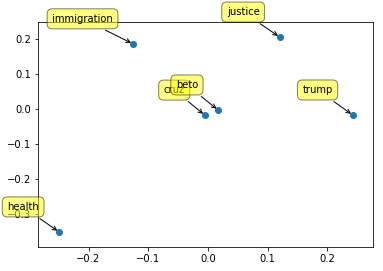

In [45]:
adist = np.array(dists)
amax = np.amax(adist)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cand_issues, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

#### Based on the above MDS map we can conclude that:
1. We can see that the association of 'trump' to both cruz and beto is highly popular. 
2. Even though cruz has more tweets than beto, it seems that 'trump' is associated more when they talk about beto. 
3. At this stage, before the sentiment analysis has been performed we can speculate that the association may be due to comparison between Democratic and Republican parties.

# Sentiment Analysis - General

#### In order to analyze the semtiments of candidates and issues, we are performing the following:
1. Unifying different variations of the names of the candidates into one variation
2. Unifying different variations of the names of the issues into one variation
3. Going over the tweets, looking at every sentence by itself, searching for mentions of both an issue and the candidate with a maximum distance between them
4. extracting the part of the sentence relating to the candidate and the issue with several words before an after
5. calculating the sentiment of the extracted part
6. calculating an average of the sentiments compund value, outputing it as the result sentiment 

We didn't stem the words since after checking the linguistic variations of the issues and candidates names, we saw that there are not so many linguistic variations of these terms

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv
from collections import namedtuple
import re

CRUZ_VARIATIONS = ['Cruz','@tedcruz’s','tedcruz', 'ted', 'choosecruz', 'cruz-', '@tedcruz', '@ted', '@choosecruz', '@cruz-']
BETO_VARIATIONS = ['Beto','BetoORourke','O\'Rourke','Beto O\'Rourke','Beto\'s','BetoORourke’s','@BetoORourke','betoorourke', "o'rourke", 'rourke', '@betoorourke', "@o'rourke", '@rourke']
TRUMP_VARIATIONS = ['@realtrumpTrump','donald trump','Donald Trump','Donald trump','Donald','donald', 'realdonaldtrump', '@donald', '@realdonaldtrump','@donald:', '@realdonaldtrump:']
IMMIGRATION_VARIATIONS = ['non-citizens','border','wall','immigrant','caravan','Non-Citizens','Border','Wall','Immigrant','Caravan']
JUSTICE_VARIATIONS = ['legal', 'fraud', 'investigation', 'justice', 'illegal', 'law', 'prison', 'attorney','Legal', 'Fraud', 'Investigation', 'Justice', 'Illegal', 'Law', 'Prison', 'Attorney']
HEALTH_VARIATIONS = ['health', 'healthcare', 'Health', 'Healthcare' ,'\*medicare', '\*medicaid', 'obamacare', 'Obamacare']

CITY_SIZE_MIDPOINT = 100000
MAX_SUBJECTS_DISTANCE = 10
SUB_SENTENCE_BOUNDARY = 2
LEFT = -1
RIGHT = 1
SMALL_CITY = 0
BIG_CITY = 1
EMPTY_CITY = -1

analyser = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english')) 

Tweet = namedtuple('Tweet', 'tweet_text tweet_location tweet_user')
Substitution = namedtuple('Substitution','subject substitutions')

substitution_list = [Substitution('beto',BETO_VARIATIONS),
                    Substitution('cruz',CRUZ_VARIATIONS),
                    Substitution('trump',TRUMP_VARIATIONS),
                    Substitution('immigration',IMMIGRATION_VARIATIONS),
                    Substitution('justice',JUSTICE_VARIATIONS),
                    Substitution('health',HEALTH_VARIATIONS)]

def skip_irrelevant_tokens(words,index,direction):
    global stop_words
    
    while index > 0 and index < len(words)-1:
        if words[index + direction] in stop_words or not words[index + direction].isalpha():
            index = index + direction
        else:
            return index
    return index
        
#for each pair of candidate-issue
#Traversing over the words, counting the index position in two ways: 1. General index, counting
#how many tokens have we went through. 2. Word index, counting only the words we went through, meaning
#no stop words, and only alpha words. We search for the two words, and if the distance between them
#is small enough, we extract part of the sentence around them
def measure_words_distance_and_extract(word1,word2,sentence):
    global stop_words
    general_index = 0
    words_index = 0
    word1_general_index = 0
    word2_general_index = 0
    word1_words_index = None
    word2_words_index = None
    word_tokens = word_tokenize(sentence)
    for word in word_tokens:
        if word.lower() == word1.lower():
            word1_words_index = words_index
            word1_general_index = general_index
        if word.lower() == word2.lower():
            word2_words_index = words_index
            word2_general_index = general_index
        if word1_words_index is not None and word2_words_index is not None:
            break
        if word not in stop_words and word.isalpha():
            words_index += 1
        general_index += 1
    if word1_words_index is None or word2_words_index is None or abs(word1_words_index - word2_words_index) > MAX_SUBJECTS_DISTANCE:
        return None

    if word1_general_index < word2_general_index:
        left_index = word1_general_index
        right_index = word2_general_index
        
    else:
        left_index = word2_general_index
        right_index = word1_general_index
    
    stop_words_count = 0
    
    for i in range(1,SUB_SENTENCE_BOUNDARY+1):
        left_index = skip_irrelevant_tokens(word_tokens,left_index,LEFT)
        right_index = skip_irrelevant_tokens(word_tokens,right_index,RIGHT)
        if left_index - i >= 0:
            left_index = left_index - i
        if right_index < len(word_tokens):
            right_index = right_index + i
    
    return ' '.join(word_tokens[left_index:right_index])
    
def extract_mutual_context(subject1,subject2,document):
    global stop_words
    
    subject1 = subject1.lower()
    subject2 = subject2.lower()
    
    for sentence in sent_tokenize(document):
        sub_sentence = measure_words_distance_and_extract(subject1,subject2,sentence.lower())
        if sub_sentence is None:
            continue

        return sub_sentence
    return None
        
def analyze_document_joint_sentiment(subject1,subject2,document):
    global analyser
    
    sub_sentence = extract_mutual_context(subject1,subject2,document)
    if sub_sentence is None:
        return None
    snt = analyser.polarity_scores(sub_sentence)
    return snt['compound']

def analyze_joint_sentiment(subject1,subject2,documents):
    total_compound = 0
    relevant_documents_count = 0
    for document in documents:
        sentiment_compound = analyze_document_joint_sentiment(subject1,subject2,document)
        if sentiment_compound is not None:
            total_compound += sentiment_compound
            relevant_documents_count += 1
    if relevant_documents_count == 0:
        total_compound = -1
    else:
        total_compound = total_compound / relevant_documents_count
    return (total_compound, relevant_documents_count)

# Sentiment Analysis - Geo

In order to analyze the sentiments of the tweets for each candidate with respect to the scale of the cities the tweets originated from, we do the following:
1. Importing a list of Texas cities, dividing them into big and small cities by a defined threshold
2. Dividing the tweets into big cities tweets and small cities tweets
3. Performing sentiment analysis for every candidate, for each tweets group, on the tweets relating to this candidate



In [47]:
def get_cities():
    big_cities = []
    small_cities = []
    with open('cities.csv','r') as csv_file:
        csv_reader = csv.reader(csv_file, quotechar='"', delimiter=',',quoting=csv.QUOTE_ALL, skipinitialspace=True)
        for row in csv_reader:
            city_name = row[0].replace(' city, Texas','')
            city_population = int(row[1])
            if city_population > CITY_SIZE_MIDPOINT:
                big_cities.append(city_name)
            else:
                small_cities.append(city_name)
    return (small_cities,big_cities)

def get_city_classification(tweet_location,small_cities,big_cities):
    for city in small_cities:
        if city.lower() in tweet_location.lower():
            return SMALL_CITY
    for city in big_cities:
        if city.lower() in tweet_location.lower():
            return BIG_CITY
    return EMPTY_CITY

def group_and_filter_tweets_by_city(tweets,small_cities,big_cities):
    small_cities_tweets = []
    big_cities_tweets = []
    
    for tweet in tweets:
        tweet_location = tweet.tweet_location.lower()
        if tweet_location is None or tweet_location == '' or not ('tx' in tweet_location or 'texas' in tweet_location):
            continue
        city_scale = get_city_classification(tweet_location,small_cities,big_cities)
        if city_scale == BIG_CITY:
            big_cities_tweets.append(tweet.tweet_text)
        elif city_scale == SMALL_CITY:
            small_cities_tweets.append(tweet.tweet_text)     
    return (small_cities_tweets,big_cities_tweets)

def analyze_average_sentiment(subject,tweets):
        sentiment = 0
        relevant_tweets_count = 0
        for tweet in tweets:
            if subject.lower() in tweet.lower():
                sentiment += analyser.polarity_scores(tweet)['compound']
                relevant_tweets_count += 1
        if relevant_tweets_count == 0:
            return None
        return (sentiment/relevant_tweets_count,relevant_tweets_count)

def analyze_sentiment_by_city_scale(subject,documents,small_cities,big_cities):
    small_cities_tweets_texts,big_cities_tweets_texts = group_and_filter_tweets_by_city(documents,small_cities,big_cities)
    
    small_cities_sentiment = analyze_average_sentiment(subject,small_cities_tweets_texts)
    big_cities_sentiment = analyze_average_sentiment(subject,big_cities_tweets_texts)

    return (small_cities_sentiment,big_cities_sentiment)
    
def calculate_candidates_issues_sentiments(tweets,candidates,issues):
    joint_sentiments = {}
    joint_sentiments_small_cities = {}
    joint_sentiments_big_cities = {}
    tweets_texts = [tweet.tweet_text for tweet in tweets]
    
    small_cities, big_cities = get_cities()
    
    for candidate in candidates:
        for issue in issues:
            joint_sentiments[(candidate,issue)] = analyze_joint_sentiment(candidate,issue,tweets_texts)
        small_cities_sentiment,big_cities_sentiment = analyze_sentiment_by_city_scale(candidate,tweets,small_cities,big_cities)
        joint_sentiments_small_cities[(candidate)] = small_cities_sentiment
        joint_sentiments_big_cities[(candidate)] = big_cities_sentiment
    return joint_sentiments,joint_sentiments_small_cities,joint_sentiments_big_cities

def get_tweets():
    tweets = []
    with open('Tweets_6-2.csv','r', encoding="utf8") as csv_file:
        csv_reader = csv.reader(csv_file, quotechar='"', delimiter=',',quoting=csv.QUOTE_ALL, skipinitialspace=True)
        for row in csv_reader:
            tweet_text = row[1]
            tweet_location = row[3]
            tweet_user = row[4]
            tweets.append(Tweet(tweet_text,tweet_location,tweet_user))
    return list(set(tweets))

def multi_word_replace(text,subject,variations):
    rc = re.compile('|'.join(variations))
    return rc.sub(subject, text)

def manipulate_tweets(tweets):
    global substitution_list
    manipulated_tweets = []
    for tweet in tweets:
        new_tweet_text = tweet.tweet_text
        for substitution in substitution_list:
            new_tweet_text = multi_word_replace(new_tweet_text,substitution.subject,substitution.substitutions)
        manipulated_tweets.append(Tweet(new_tweet_text,tweet.tweet_location,tweet.tweet_user))
    return manipulated_tweets

In [48]:
tweets = get_tweets()
tweets = manipulate_tweets(tweets)

candidates = ['beto','cruz']
issues = ['trump','immigration','health','justice']
joint_sentiments,joint_sentiments_small_cities,joint_sentiments_big_cities = calculate_candidates_issues_sentiments(tweets,candidates,issues)

print ('General sentiments\n')
print(joint_sentiments)
print ('\nGeographic sentiments\nSmall Cities')
print(joint_sentiments_small_cities)
print('\nBig Cities')
print(joint_sentiments_big_cities)

General sentiments

{('beto', 'trump'): (0.03598928571428572, 28), ('beto', 'immigration'): (0.09077333333333333, 15), ('beto', 'health'): (0.5018687500000001, 16), ('beto', 'justice'): (0.7906, 1), ('cruz', 'trump'): (0.006082258064516127, 124), ('cruz', 'immigration'): (0.11017777777777778, 9), ('cruz', 'health'): (0.478235, 20), ('cruz', 'justice'): (0.41463333333333335, 3)}

Geographic sentiments
Small Cities
{'beto': (0.16051071428571428, 28), 'cruz': (0.19531818181818184, 33)}

Big Cities
{'beto': (0.1806410714285714, 112), 'cruz': (0.11779622641509432, 106)}


In [49]:
small_cities_sent={('beto','small_city'):0,('cruz','small_city'):0}
for k,v in small_cities_sent.items():
        small_cities_sent[k]=joint_sentiments_small_cities[k[0]]
small_cities_sent

big_cities_sent={('beto','big_city'):0,('cruz','big_city'):0}
for k,v in big_cities_sent.items():
        big_cities_sent[k]=joint_sentiments_big_cities[k[0]]
big_cities_sent

joint_sentiments_loc={**small_cities_sent,**big_cities_sent}

In [50]:
joint_sentiments_table = pd.DataFrame(index=candidate, columns=issues)

for c,i in joint_sentiments:
    joint_sentiments_table.loc[c][i] = float(joint_sentiments[c,i][0])
    

joint_sentiments_loc_table = pd.DataFrame(index=candidate, columns=('big_city','small_city'))

for c,i in joint_sentiments_loc:
    joint_sentiments_loc_table.loc[c][i] = float(joint_sentiments_loc[c,i][0])


In [51]:
joint_sentiments_table

,trump,immigration,health,justice
cruz,0.00608226,0.110178,0.478235,0.414633
beto,0.0359893,0.0907733,0.501869,0.7906


In [52]:
joint_sentiments_loc_table

,big_city,small_city
cruz,0.117796,0.195318
beto,0.180641,0.160511


#### Regarding the general sentiment analysis, we can see that
1. We see that cruz relation to trump is mentioned way more then beto's relation to trump, as we could expect. Cruz has a slight negative sentiment related to trump, while beto is surprisingly related to trump in a more neutral way. Further analysis on a larger sample could shed some more light and explain whether or not the relation is actually negative, and could effect negativly on Cruz
2. We can see that Beto is related to justice more positively then Cruz (0.79 vs 0.41) and also with more mentions then Cruz. Although Cruz's relation to that issue is positive, he might want to emphasize more on that matter
3. We can see that Cruz and Beto are both related to health issues in a positive way (0.47 vs 0.5), with beto having a slight more positively relation to it, Cruz might want to relate more to that issue and raise public opinion regarding his relation to it
4. The most related candidate and issue are Cruz and Trump. Cruz should really carefully assess the influence of trump on his image and utilize trump's effect and power on public opinion in his favor.

#### Regarding the geographic sentiment analysis
1. First, we could see that given the diversity in locations in twitter, the relevant Texas sample size reduced drastically leaving us with a much smaller sample to create statistically valid insights from
2. We could see that in small cities, Beto and Cruz's sentiments are very close, while in bigger cities the sentiment towards beto is more positive. This shows that Beto has a slight advantage on Cruz in bigger cities
3. We can see that in general, there are more mentions of the candidates in big cities then in smaller cities, and this is interesting given the fact that small cities total population is 2 times the population of the big cities we chose. This might mean that people in smaller cities are less involved in politics then in bigger cities, and so the candidates would want to emphasize on bigger cities.



## Lift analysis for locations

In [293]:
tweets

[Tweet(tweet_text='full_text', tweet_location='location'),
 Tweet(tweet_text='RT @jennycohn1: If you want beto to defeat Ted Cruz in Texas, pls read the thread below. We cannot mitigate the risk of vote tally…', tweet_location='Portland, OR'),
 Tweet(tweet_text="Four people are dead after shooting at a 1-year-old's birthday party in Texas  https://t.co/kzVEitnklJ", tweet_location='Instagram - PinkLipPash'),
 Tweet(tweet_text='RT @StephenKing: Hey, Texas! Polls say Cruz is pulling away. Please Dems and Indies, vote Beto so I don’t have to look at that slimy crawda…', tweet_location='London, England'),
 Tweet(tweet_text='RT @atDavidHoffman: What the hell is wrong with Texas? Republicans have one of the smarmiest men ever as their candidate for Senate, Ted Cr…', tweet_location='California, USA'),
 Tweet(tweet_text='RT @StephenKing: Hey, Texas! Polls say Cruz is pulling away. Please Dems and Indies, vote Beto so I don’t have to look at that slimy crawda…', tweet_location='Pittsburgh, PA'),

In [294]:
small_cities,big_cities= get_cities()


def filter_tweets_by_city(tweets,small_cities,big_cities):
    small_cities_tweets = []
    big_cities_tweets = []
    
    for tweet in tweets:
        tweet_location = tweet.tweet_location.lower()
        if tweet_location is None or tweet_location == '' or not ('tx' in tweet_location or 'texas' in tweet_location):
            continue
        city_scale = get_city_classification(tweet_location,small_cities,big_cities)
        if city_scale == BIG_CITY:
            big_cities_tweets.append(tweet)
        elif city_scale == SMALL_CITY:
            small_cities_tweets.append(tweet)
    #print(len(small_cities_tweets),len(big_cities_tweets))        
    return (small_cities_tweets,big_cities_tweets)


small_city_tweets,big_city_tweets=filter_tweets_by_city(tweets,small_cities,big_cities)



In [295]:
small_city_len=len(small_city_tweets)
big_city_len=len(big_city_tweets)

In [296]:
cruz_tweets=0
beto_tweets=0
for tweet in tweets:
    tweet=tweet[0].lower()
    print(tweet)
    if 'cruz' in tweet or 'ted' in tweet:
        cruz_tweets+=1
    if 'beto' in tweet or 'o’rourke' in tweet:
        beto_tweets+=1

full_text
rt @jennycohn1: if you want beto to defeat ted cruz in texas, pls read the thread below. we cannot mitigate the risk of vote tally…
four people are dead after shooting at a 1-year-old's birthday party in texas  https://t.co/kzveitnklj
rt @stephenking: hey, texas! polls say cruz is pulling away. please dems and indies, vote beto so i don’t have to look at that slimy crawda…
rt @atdavidhoffman: what the hell is wrong with texas? republicans have one of the smarmiest men ever as their candidate for senate, ted cr…
rt @stephenking: hey, texas! polls say cruz is pulling away. please dems and indies, vote beto so i don’t have to look at that slimy crawda…
u.s. plans to expand tent camp in texas for unaccompanied migrant children https://t.co/kbkkzojxhk
rt cruz: over 2000 texans came out for our el paso rally last night. amazing energy &amp; passion. when our liberty is threatened, when our…
rt @dawg_lb: re-elect senator ted cruz 2018 u.s. senate texas, keep red!

senator ted cruz h

rt @__leprechaun__: damn texas really heard us saying we want cold weather and said “ here damn with yo beggin ass” now look at us we cold
felito!!! where are you?? cruz hoping to hide his mug so people won’t remember he’s the @gop running for senate re-election who hasn’t done anything for the sick or the poor!🇨🇱texas time for change beto november 6!🇨🇱 https://t.co/kbnubh9toz
rt @realtokyojetz: dallas, texas i love y’all ❤️ https://t.co/1jl7coazjk
rt @usatoday: a woman who said a texas state trooper sexually assaulcruz her could face charges herself, after body cam video released by te…
rt beto: texas needs a full-time senator. one who will not divide and forget us but who will serve, represent, and fight for every…
rt @bdisgusting: [editorial] the artful brilliance of tobe hooper’s ‘the texas chain saw massacre’ is too often overlooked https://t.co/hi8…
guest on hagee hotline “you were born to fly” #authors #bestseller #books #bestsellingauthor #believe #believeinyourself #confidence

rt @theonion: new ted cruz attack ad declares beto o’rourke too good for texas https://t.co/7bwcloiscd https://t.co/k2cm4jlrxo
rt @ingrahamangle: two texas residents, enriching cartels (and themselves) by smuggling illegals after traffic stop. cost 18,000 pesos per…
rt @nasaedu: only 5 days left to launch your journey with the high school aerospace scholars.  texas high school juniors, apply today and s…
rt @isbell1joseph: when @koewetzel said: “it’s been raining for five full days”...

texas felt that.
rt beto: this is the election of our lifetime. we have the opportunity to inspire texas, our country, and the world. rt to share be…
rt @trumpstaxes: stories like this in blue cities like nashville make me wonder if we are underestimating how big the #bluewave will be.

n…
rt @npc85280237: i fight for justice. i fight for my wife, i fight for my wife’s boyfriend. i fight for all bi-racial trans poly relationsh…
rt @conservamomusa: hey #texas! california-dweller @evalongoria is interferi

In [297]:
beto_tweets

867

In [298]:
small_city_list=[]
for each in small_cities:
    for cand in candidate:
        small_city_list.append(((cand,each),0))
small_city_list

big_city_list=[]
for each in big_cities:
    for cand in candidate:
        big_city_list.append(((cand,each),0))
big_city_list

small_city_dict = dict((x,y) for x, y in small_city_list)
big_city_dict = dict((x,y) for x, y in big_city_list)
small_city_dict

{('cruz', 'Edinburg'): 0,
 ('beto', 'Edinburg'): 0,
 ('cruz', 'Sugar Land'): 0,
 ('beto', 'Sugar Land'): 0,
 ('cruz', 'Mission'): 0,
 ('beto', 'Mission'): 0,
 ('cruz', 'Conroe'): 0,
 ('beto', 'Conroe'): 0,
 ('cruz', 'Bryan'): 0,
 ('beto', 'Bryan'): 0,
 ('cruz', 'Longview'): 0,
 ('beto', 'Longview'): 0,
 ('cruz', 'Pharr'): 0,
 ('beto', 'Pharr'): 0,
 ('cruz', 'New Braunfels'): 0,
 ('beto', 'New Braunfels'): 0,
 ('cruz', 'Baytown'): 0,
 ('beto', 'Baytown'): 0,
 ('cruz', 'Flower Mound town, Texas'): 0,
 ('beto', 'Flower Mound town, Texas'): 0,
 ('cruz', 'Cedar Park'): 0,
 ('beto', 'Cedar Park'): 0,
 ('cruz', 'Temple'): 0,
 ('beto', 'Temple'): 0,
 ('cruz', 'Missouri City'): 0,
 ('beto', 'Missouri City'): 0,
 ('cruz', 'Georgetown'): 0,
 ('beto', 'Georgetown'): 0,
 ('cruz', 'North Richland Hills'): 0,
 ('beto', 'North Richland Hills'): 0,
 ('cruz', 'Mansfield'): 0,
 ('beto', 'Mansfield'): 0,
 ('cruz', 'Victoria'): 0,
 ('beto', 'Victoria'): 0,
 ('cruz', 'Harlingen'): 0,
 ('beto', 'Harlingen'):

In [299]:
for message in small_city_tweets:
    flag=0
    for k,v in small_city_dict.items():
        loc=k[1].lower()
        cand=k[0].lower()
        msg_loc_lower=message[1].lower().split(',')[0]
        msg_lower=message[0].lower()
        if loc in msg_loc_lower:
            if cand in msg_lower:
                print('Yes!!!!')
                small_city_dict[k]+=1

Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!
Yes!!!!


In [300]:
small_city_dict = {k : v for k,v in small_city_dict.items() if v>0}

In [301]:
cruz_smallcity={('cruz','small_city') : 0 }
beto_smallcity={('beto','small_city') : 0 }
for k,v in small_city_dict.items():
    if k[0]=='cruz':
        cruz_smallcity[('cruz','small_city')]+=v
    if k[0]=='beto':
        beto_smallcity[('beto','small_city')]+=v

In [302]:
for message in big_city_tweets:
    flag=0
    for k,v in big_city_dict.items():
        loc=k[1].lower()
        cand=k[0].lower()
        msg_loc_lower=message[1].lower().split(',')[0]
        msg_lower=message[0].lower()
        if loc in msg_loc_lower:
            if cand in msg_lower:
                #print('Yes!!!!')
                big_city_dict[k]+=1

In [303]:
big_city_dict = {k : v for k,v in big_city_dict.items() if v>0}
big_city_dict

{('cruz', 'Houston'): 9,
 ('beto', 'Houston'): 13,
 ('cruz', 'Dallas'): 17,
 ('beto', 'Dallas'): 13,
 ('cruz', 'Austin'): 14,
 ('beto', 'Austin'): 13,
 ('beto', 'El Paso'): 3,
 ('beto', 'Corpus Christi'): 1,
 ('cruz', 'Plano'): 2,
 ('beto', 'Plano'): 1,
 ('cruz', 'Lubbock'): 4,
 ('beto', 'Lubbock'): 2,
 ('cruz', 'Amarillo'): 1,
 ('cruz', 'Brownsville'): 1,
 ('beto', 'Brownsville'): 1,
 ('cruz', 'McKinney'): 1,
 ('beto', 'McKinney'): 1,
 ('beto', 'Frisco'): 1,
 ('cruz', 'McAllen'): 2,
 ('beto', 'McAllen'): 1,
 ('cruz', 'Denton'): 2,
 ('beto', 'Denton'): 1,
 ('beto', 'Midland'): 1,
 ('cruz', 'Abilene'): 1,
 ('cruz', 'Richardson'): 1,
 ('cruz', 'College Station'): 1,
 ('beto', 'College Station'): 2,
 ('cruz', 'Tyler'): 1,
 ('cruz', 'Allen'): 2,
 ('beto', 'Allen'): 1}

In [304]:
cruz_bigcity={('cruz','big_city') : 0 }
beto_bigcity={('beto','big_city') : 0 }
for k,v in big_city_dict.items():
    if k[0]=='cruz':
        cruz_bigcity[('cruz','big_city')]+=v
    if k[0]=='beto':
        beto_bigcity[('beto','big_city')]+=v

city_cand={**cruz_bigcity,**beto_bigcity,**cruz_smallcity,**beto_smallcity}
city_cand

{('cruz', 'big_city'): 59,
 ('beto', 'big_city'): 55,
 ('cruz', 'small_city'): 21,
 ('beto', 'small_city'): 17}

In [305]:
city_len={'small_city':small_city_len, 'big_city':big_city_len}
city_len

{'small_city': 86, 'big_city': 259}

In [306]:
cand_tweets=beto_tweets,cruz_tweets
cand_tweets

(867, 923)

In [472]:
lift_values_loc={}
for k,v in city_cand.items():
    x=str(k[1])
    #print(x)
    if k[0]=='cruz':
        pair_lift=((len(tweets)*v)/(cruz_tweets * city_len[x]))
        lift_values_loc[k] = float(round(pair_lift,2))
    if k[0]=='beto':
        pair_lift=((len(tweets)*v)/(beto_tweets * city_len[x]))
        lift_values_loc[k] = float(round(pair_lift,2))

In [473]:
lift_values_loc

{('cruz', 'big_city'): 0.72,
 ('beto', 'big_city'): 0.71,
 ('cruz', 'small_city'): 0.77,
 ('beto', 'small_city'): 0.66}

In [474]:
lift_table_loc = pd.DataFrame(index=('cruz','beto'), columns=('big_city','small_city'))
                                                                
for c,i in lift_values_loc:
    lift_table_loc.loc[c][i] = float(lift_values_loc[c,i])

In [475]:
lift_table_loc

,big_city,small_city
cruz,0.72,0.77
beto,0.71,0.66


#### As per the above lift table:
1. Both candidates are almost equally popular in big cities
2. Cruz is a clear winner for small cities.
3. If Beto focuses more on targeting big cities in Texas, he would have a better chance of winning more voting candidates and thus overcome the gap created due to popularity of Cruz in small cities.